<a href="https://colab.research.google.com/github/Mateus929/cifar10-score-diffusion/blob/main/notebooks/score_based.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setup

This section contains setup code specific to running the notebook on Google Colab. This code depends on the environment and may need to be adjusted based on your specific setup.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%%capture
from google.colab import userdata
token = userdata.get('GITHUB_TOKEN')
user_name = userdata.get('GITHUB_USERNAME')
mail = userdata.get('GITHUB_MAIL')

!git config --global user.name "{user_name}"
!git config --global user.email "{mail}"
!git clone https://{token}@github.com/Mateus929/cifar10-score-diffusion.git

%cd cifar10-score-diffusion

In [3]:
%%capture
from google.colab import userdata
wandb_api_login = userdata.get('WANDB_API_LOGIN')
! pip install -r requirements.txt
! wandb login {wandb_api_login}

In [4]:
import os
os.environ["BASE_WORK_DIR"] = "/content/drive/MyDrive/score_diffusion"

# Sample Run

In [ ]:

config = {
    # Metadata
    "run_name": "dsm-cifar10-ve-v1-score-net",
    # "run_id": None,

    # Training Hyperparameters
    "epochs": 100,  # Score models need many epochs (often 100-500+)
    "lr": 2e-4,  # Adam works best with a lower LR for UNets
    "batch_size": 128,

    # Noise Schedule (VE-SDE Specific)
    "sigma_min": 0.01,  # Small enough to capture fine details
    "sigma_max": 50.0,  # Large enough to cover the data distribution diameter
    "T": 1.0,  # Max time horizon

    # Sampling / Evaluation (Langevin Dynamics)
    "eval": True,
    "num_eval_images": 10000,  # Start small to save time, increase to 10k/50k for final FID
    "n_steps_per_sigma": 10,  # Higher steps = better quality but slower
    "step_size_factor": 2e-5,  # Controls the Langevin step magnitude

    # Checkpointing
    "save_every": 5,
    "resume_training": False,

    #Model

    "model_name": "score-net"
}

from train import train_dsm
train_dsm.train_dsm(config)

Current run id:  ed57facd


wandb: [wandb.login()] Loaded credentials for https://api.wandb.ai from /root/.netrc.
wandb: Currently logged in as: zhorzholianimate (MLBeasts) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


100%|██████████| 170M/170M [00:19<00:00, 8.67MB/s]


Starting training from epoch  0
0/100, loss: 69077607564521.086
1/100, loss: 75819438093786.03
2/100, loss: 74898690632209.02
3/100, loss: 69760418713694.28
4/100, loss: 66308505812614.875
5/100, loss: 65319322740929.8
6/100, loss: 67823627360355.516
7/100, loss: 68812331508612.914
8/100, loss: 68159318449191.28
9/100, loss: 62073503190799.06
10/100, loss: 65508749594676.375
11/100, loss: 55287045204371.31
12/100, loss: 68891279179231.266
13/100, loss: 80124135093763.92
14/100, loss: 71800875852048.38
15/100, loss: 65212496176926.77
16/100, loss: 65591823229996.52
17/100, loss: 67331071144847.38
18/100, loss: 68389449703025.92
19/100, loss: 64682722367398.95
20/100, loss: 66862295839526.63
21/100, loss: 60619661642403.68
22/100, loss: 73180481036455.61
23/100, loss: 65247623232572.234
24/100, loss: 67198907384227.03
25/100, loss: 60361189388528.94
26/100, loss: 66804650652098.45
27/100, loss: 66024443283209.82
28/100, loss: 78970647581185.31
29/100, loss: 67621952963607.57
30/100, loss

100%|██████████| 79/79 [51:24<00:00, 39.04s/it]


Calculating FID and IS scores...
Downloading: "https://download.pytorch.org/models/inception_v3_google-0cc3c7bd.pth" to /root/.cache/torch/hub/checkpoints/inception_v3_google-0cc3c7bd.pth


100%|██████████| 104M/104M [00:00<00:00, 139MB/s] 
FID/IS Progress: 100%|██████████| 79/79 [00:37<00:00,  2.10it/s]


Train: {'FID': 473.00478527262595, 'IS_MEAN': 1.2629188299179077, 'IS_STD': 0.009402861818671227}
Test: {'FID': 473.00478527262595, 'IS_MEAN': 1.2629188299179077, 'IS_STD': 0.009402861818671227}


epoch/epoch,▁▁▁▁▂▂▂▂▂▂▂▃▃▃▃▃▃▃▄▄▄▄▄▄▅▅▅▆▆▆▆▆▇▇▇█████
epoch/loss,▆▅▄▃▄▃▁▄▇▅▄▂▃▆▄▃▄▅▃▃▃▃▅▄▃▄▆▆▂▄▃▅▂▂▃▅▄▆█▄
metrics/fid_test,▁
metrics/fid_train,▁
metrics/is_test_mean,▁
metrics/is_test_std,▁
metrics/is_train_mean,▁
metrics/is_train_std,▁
epoch/epoch,99
epoch/loss,71927695731636.05
metrics/fid_test,473.00479


ScoreNet(
  (temb_dense0): Linear(in_features=128, out_features=512, bias=True)
  (temb_dense1): Linear(in_features=512, out_features=512, bias=True)
  (temb_proj): Linear(in_features=512, out_features=128, bias=True)
  (conv1): Conv2d(3, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(2, 2), dilation=(2, 2))
  (conv3): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(4, 4), dilation=(4, 4))
  (conv4): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv_out): Conv2d(128, 3, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (gn1): GroupNorm(8, 128, eps=1e-05, affine=True)
  (gn2): GroupNorm(8, 128, eps=1e-05, affine=True)
  (gn3): GroupNorm(8, 128, eps=1e-05, affine=True)
  (gn4): GroupNorm(8, 128, eps=1e-05, affine=True)
)

In [ ]:

config = {
    # Metadata
    "run_name": "dsm-cifar10-ve-v2-score-net",
    # "run_id": None,

    # Training Hyperparameters
    "epochs": 100,  # Score models need many epochs (often 100-500+)
    "lr": 2e-4,  # Adam works best with a lower LR for UNets
    "batch_size": 128,

    # Noise Schedule (VE-SDE Specific)
    "sigma_min": 0.01,  # Small enough to capture fine details
    "sigma_max": 50.0,  # Large enough to cover the data distribution diameter
    "T": 1.0,  # Max time horizon

    # Sampling / Evaluation (Langevin Dynamics)
    "eval": True,
    "num_eval_images": 10000,  # Start small to save time, increase to 10k/50k for final FID
    "n_steps_per_sigma": 10,  # Higher steps = better quality but slower
    "step_size_factor": 2e-5,  # Controls the Langevin step magnitude

    # Checkpointing
    "save_every": 5,
    "resume_training": False,

    #Model

    "model_name": "score-net"
}

from train import train_dsm
train_dsm.train_dsm(config)

NEW TRAINING
Current run id:  71698bcc


wandb: [wandb.login()] Loaded credentials for https://api.wandb.ai from /root/.netrc.
wandb: Currently logged in as: zhorzholianimate (MLBeasts) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


Starting training from epoch  0
0/100, loss: 9862.413376908167
1/100, loss: 2383.6670621203643
2/100, loss: 1772.8209319053708
3/100, loss: 1522.7114685526894
4/100, loss: 1446.8378500389626
5/100, loss: 1423.5253253751398
6/100, loss: 1291.8609210158247
7/100, loss: 1443.7324968030691
8/100, loss: 1203.6018487876638
9/100, loss: 1161.0248108690657
10/100, loss: 1035.9200603358277
11/100, loss: 974.7092895507812
12/100, loss: 884.7487177934183
13/100, loss: 863.8934958377457
14/100, loss: 732.7756549025436
15/100, loss: 756.3744873671276
16/100, loss: 735.7665642545657
17/100, loss: 668.7417248191736
18/100, loss: 696.1197050831202
19/100, loss: 643.2978337670836
20/100, loss: 621.6060270421646
21/100, loss: 650.2786811379825
22/100, loss: 600.340513263517
23/100, loss: 743.8936936946781
24/100, loss: 561.2093146048543
25/100, loss: 555.5110554804887
26/100, loss: 563.6821922829084
27/100, loss: 580.1343723306875
28/100, loss: 512.3329709728661
29/100, loss: 564.3434240628997
30/100, l

100%|██████████| 79/79 [51:23<00:00, 39.03s/it]


Calculating FID and IS scores...


FID/IS Progress: 100%|██████████| 79/79 [00:37<00:00,  2.10it/s]


Train: {'FID': 497.37125100120664, 'IS_MEAN': 1.2519344091415405, 'IS_STD': 0.007916275411844254}
Test: {'FID': 497.29765009211013, 'IS_MEAN': 1.2519344091415405, 'IS_STD': 0.007916275411844254}


epoch/epoch,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▅▅▅▅▅▅▅▅▆▆▆▆▆▆▇▇▇████
epoch/loss,██▇█▆▄▄▄▃▄▃▃▃▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
metrics/fid_test,▁
metrics/fid_train,▁
metrics/is_test_mean,▁
metrics/is_test_std,▁
metrics/is_train_mean,▁
metrics/is_train_std,▁
epoch/epoch,99
epoch/loss,258.09445
metrics/fid_test,497.29765


ScoreNet(
  (temb_dense0): Linear(in_features=128, out_features=512, bias=True)
  (temb_dense1): Linear(in_features=512, out_features=512, bias=True)
  (temb_proj): Linear(in_features=512, out_features=128, bias=True)
  (conv1): Conv2d(3, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(2, 2), dilation=(2, 2))
  (conv3): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(4, 4), dilation=(4, 4))
  (conv4): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv_out): Conv2d(128, 3, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (gn1): GroupNorm(8, 128, eps=1e-05, affine=True)
  (gn2): GroupNorm(8, 128, eps=1e-05, affine=True)
  (gn3): GroupNorm(8, 128, eps=1e-05, affine=True)
  (gn4): GroupNorm(8, 128, eps=1e-05, affine=True)
)

In [6]:

config = {
    # Metadata
    "run_name": "dsm-cifar10-ve-v3-score-net",
    "run_id": "81b10612",

    # Training Hyperparameters
    "epochs": 100,  # Score models need many epochs (often 100-500+)
    "lr": 2e-4,  # Adam works best with a lower LR for UNets
    "batch_size": 128,

    # Noise Schedule (VE-SDE Specific)
    "sigma_min": 0.01,  # Small enough to capture fine details
    "sigma_max": 30.0,  # Large enough to cover the data distribution diameter
    "T": 1.0,  # Max time horizon

    # Sampling / Evaluation (Langevin Dynamics)
    "eval": True,
    "num_eval_images": 5000,  # Start small to save time, increase to 10k/50k for final FID
    "n_steps_per_sigma": 50,  # Higher steps = better quality but slower
    "step_size_factor": 1e-5,  # Controls the Langevin step magnitude
    "num_slices": 50,

    # Checkpointing
    "save_every": 5,
    "resume_training": True,

    #Model

    "model_name": "score-net"
}

from train import train_dsm
model = train_dsm.train_dsm(config)

Current run id:  81b10612


epoch/epoch,99
epoch/loss,261.47805


Starting training from epoch  100
Generating 5000 images using DSM Langevin...


100%|██████████| 40/40 [1:02:20<00:00, 93.51s/it]


Calculating FID and IS scores...
Downloading: "https://download.pytorch.org/models/inception_v3_google-0cc3c7bd.pth" to /root/.cache/torch/hub/checkpoints/inception_v3_google-0cc3c7bd.pth


100%|██████████| 104M/104M [00:00<00:00, 132MB/s]
FID/IS Progress: 100%|██████████| 40/40 [00:18<00:00,  2.21it/s]


Train: {'FID': 498.0105842252826, 'IS_MEAN': 1.257665753364563, 'IS_STD': 0.006725211162120104}
Test: {'FID': 497.91948318463443, 'IS_MEAN': 1.257665753364563, 'IS_STD': 0.006725211162120104}


metrics/fid_test,▁
metrics/fid_train,▁
metrics/is_test_mean,▁
metrics/is_test_std,▁
metrics/is_train_mean,▁
metrics/is_train_std,▁
epoch/epoch,99
epoch/loss,261.47805
metrics/fid_test,497.91948
metrics/fid_train,498.01058
metrics/is_test_mean,1.25767


Generating 4 images using DSM Langevin...


100%|██████████| 1/1 [02:04<00:00, 124.88s/it]


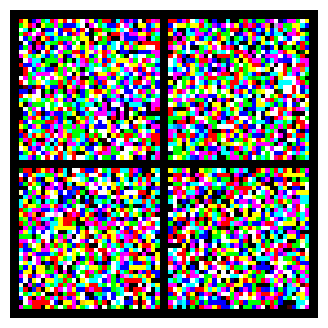

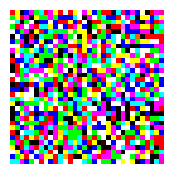

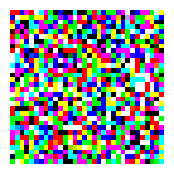

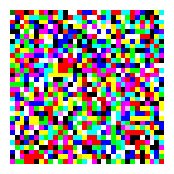

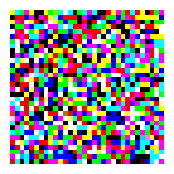

In [11]:
from generators.dsm_sampler import dsm_sampler

model.eval()
device = next(model.parameters()).device

config = {
    "batch_size": 4,           # Matches your num_eval_images
    "sigma_min": 0.01,
    "sigma_max": 30.0,
    "T": 1.0,
    "num_eval_images": 4,
    "n_steps_per_sigma": 1000,  # 100 is the "Golden Standard" for convergence
    "num_slices": 100,         # 100 slices provides a very smooth annealing ramp
    "step_size_factor": 2e-5,  # Slightly higher than 1e-5 to ensure movement
}



fake_images = dsm_sampler(model, config, device)
images = (fake_images + 1) / 2.0  # [-1,1] -> [0,1]
import matplotlib.pyplot as plt
import torchvision
grid_img = torchvision.utils.make_grid(images, nrow=2)  # 2x2 grid
plt.figure(figsize=(4,4))
plt.imshow(grid_img.permute(1, 2, 0))  # CHW -> HWC
plt.axis('off')
plt.show()
for i in range(fake_images.size(0)):
    img = images[i]
    plt.figure(figsize=(2,2))
    plt.imshow(img.permute(1, 2, 0))
    plt.axis('off')
    plt.show()
